 Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

 Making separate dataframes for train and test data

In [2]:
train_data = pd.read_csv(r"C:\Users\akshi\Downloads\customer_behavior_train.csv")
test_data = pd.read_csv(r"C:\Users\akshi\Downloads\customer_behavior_test.csv")

In [3]:
train_data.head()

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Referral,Browser_Refresh_Rate,Last_Ad_Seen,Purchase
0,2.29,5.37,1,10.00,Facebook,143.14,D,1
1,7.49,16.36,0,25.52,Instagram,136.66,A,1
2,5.71,13.69,0,10.00,Google,67.13,C,0
3,1.23,3.22,1,41.49,Google,92.12,C,0
4,3.55,10.72,0,21.57,Direct,70.31,B,0


Extracting the numerical and categorical columns since they need to undergo different preprocessing steps

In [4]:
cat_cols = train_data.select_dtypes(include = 'object').columns
num_cols = train_data.select_dtypes(include = 'number').columns

Visualising the data in categorical columns using bar diagrams

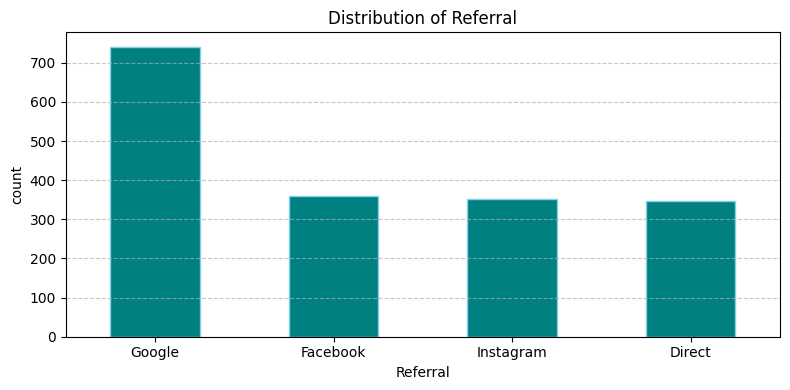

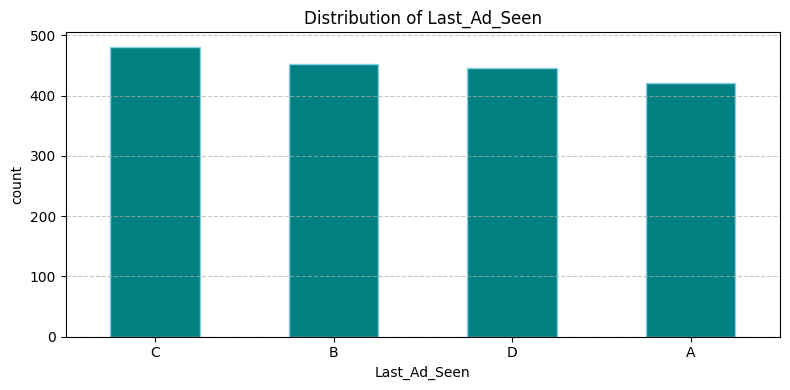

In [5]:
for col in cat_cols:
    plt.figure(figsize = (8,4))
    train_data[col].value_counts().plot(kind = 'bar',color = 'teal',edgecolor = 'skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation = 0)
    plt.tight_layout()
    plt.grid(axis = 'y',linestyle = '--',alpha = 0.7)
    plt.show()


Visualsing the data in numerical data using histograms

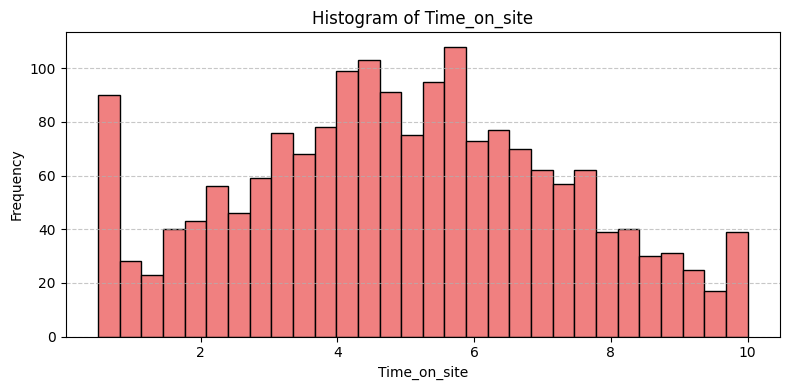

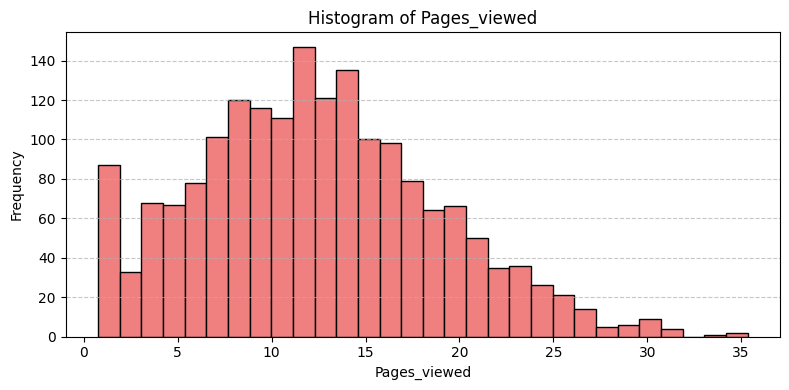

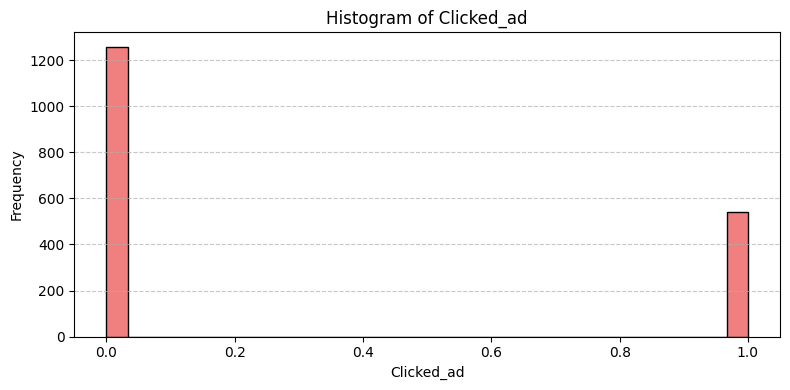

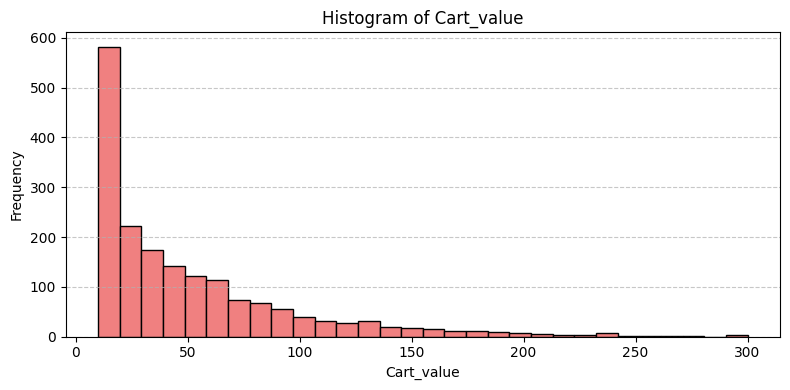

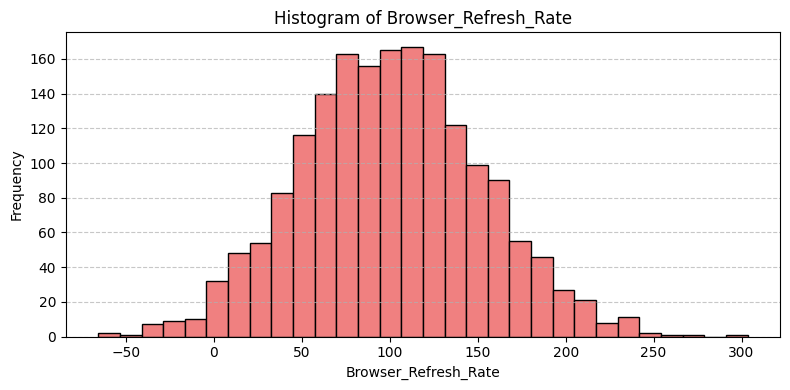

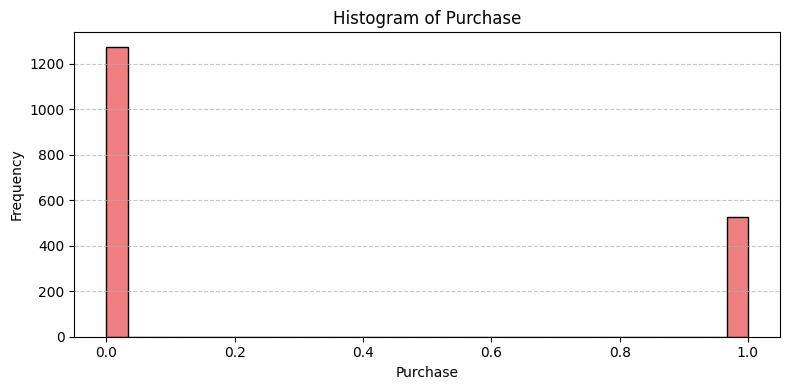

In [6]:
for col in num_cols:
    plt.figure(figsize = (8,4))
    plt.hist(train_data[col],bins = 30,color = 'lightcoral',edgecolor = 'black')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(axis = 'y',linestyle = '--',alpha = 0.7)
    plt.tight_layout()
    plt.show()

Visualising the correlations between the features using correlation heatmap using seaborn

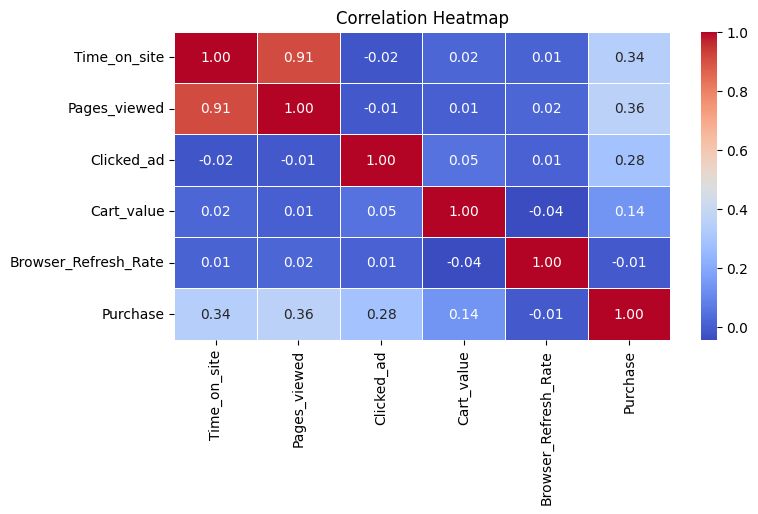

In [7]:
import seaborn as sns
corr = train_data[num_cols].corr()
plt.figure(figsize = (8,4))
sns.heatmap(corr,annot = True,fmt = '0.2f',cmap = 'coolwarm',linewidths = 0.5)
plt.title('Correlation Heatmap')
plt.show()

We can also find the values of correlations of the numerical features with the target variable( ie 'Purchase')

In [8]:
correlations = train_data[num_cols].corr()['Purchase'].sort_values(ascending = False)
correlations

Purchase                1.000000
Pages_viewed            0.358996
Time_on_site            0.344128
Clicked_ad              0.283907
Cart_value              0.137851
Browser_Refresh_Rate   -0.005686
Name: Purchase, dtype: float64

We can establish that the feature 'Browser_Refresh_Rate' is pretty much irrelevant from the correlation value. So, I have decided to drop the column to make the computation quicker

Concatenating both train and test data to perform the necessary preprocessing steps

In [9]:
all_data = pd.concat([train_data,test_data])

In [10]:
all_data.drop(columns = 'Browser_Refresh_Rate',axis = 1,inplace = True)
num_cols= num_cols[num_cols != 'Browser_Refresh_Rate']

In [11]:
num_cols

Index(['Time_on_site', 'Pages_viewed', 'Clicked_ad', 'Cart_value', 'Purchase'], dtype='object')

Using boxplots for further visualisation of distribution of data and also for outlier detection

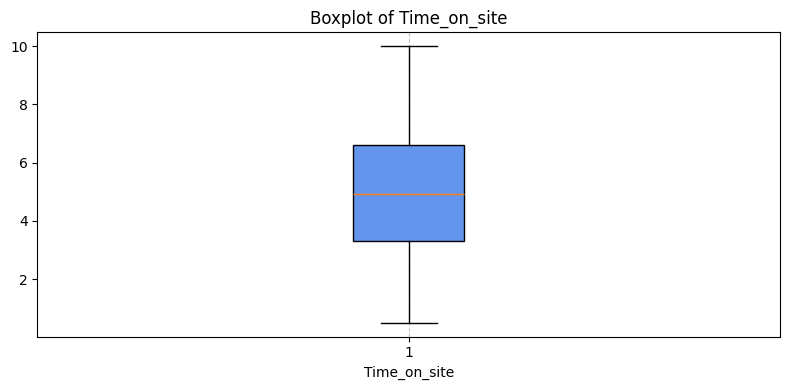

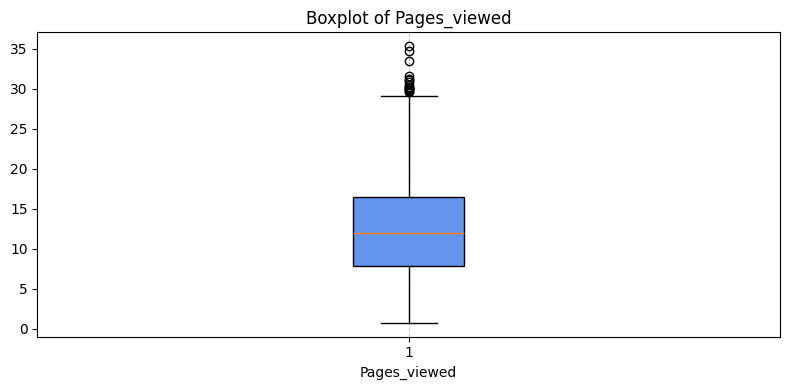

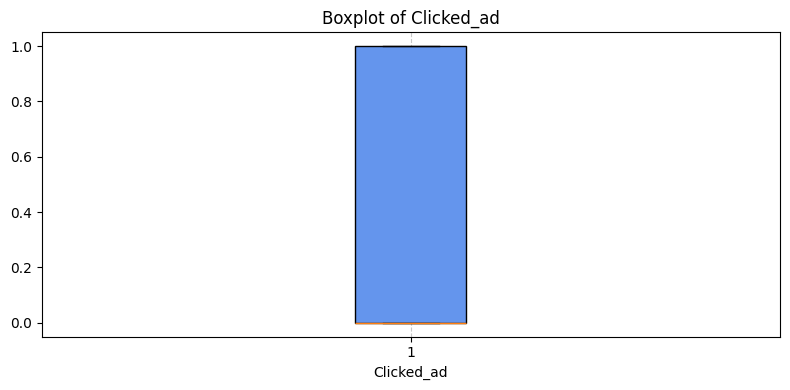

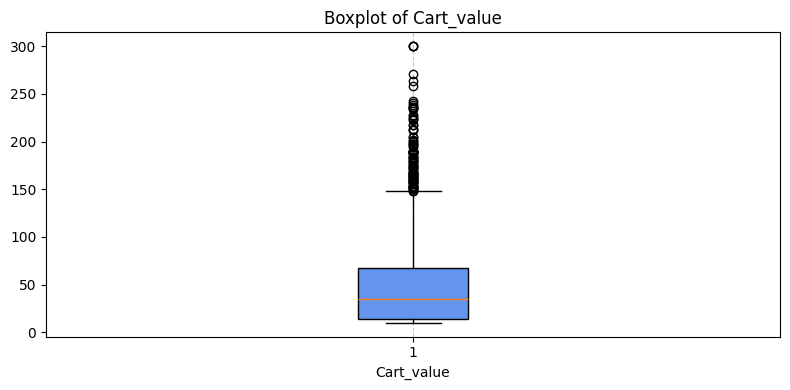

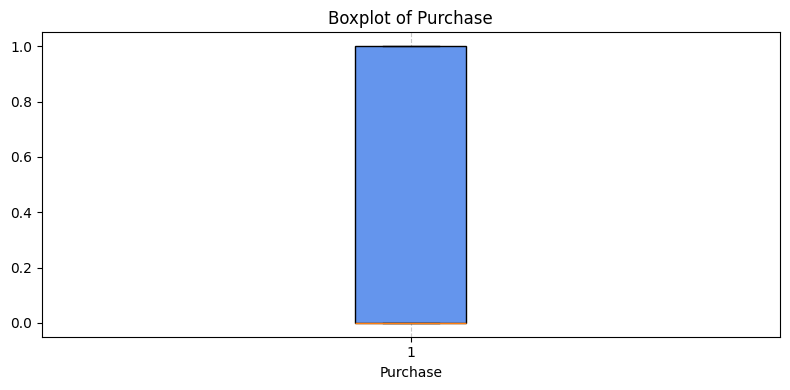

In [12]:
for col in num_cols:
    plt.figure(figsize = (8,4))
    plt.boxplot(train_data[col],vert =True,patch_artist = True,boxprops = dict(facecolor = 'cornflowerblue')
                )
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.grid(axis = 'x',linestyle = '--',alpha = 0.7)
    plt.tight_layout()
    plt.show()

Since the number of outliers in 'Cart_value' column is relatively large, I recognised that the data is skewed. Thus , I applied log transformation on the column to make the data more symmetric

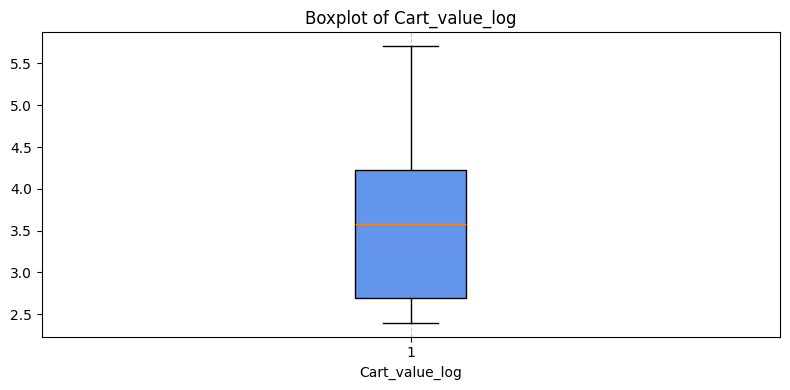

In [13]:
all_data['Cart_value_log'] = np.log(all_data['Cart_value'] + 1)

all_data.drop('Cart_value',axis = 1)
train_data = all_data[:1800]
plt.figure(figsize = (8,4))
plt.boxplot(train_data['Cart_value_log'],vert =True,patch_artist = True,boxprops = dict(facecolor = 'cornflowerblue'))
                
plt.title(f'Boxplot of Cart_value_log')
plt.xlabel('Cart_value_log')
plt.grid(axis = 'x',linestyle = '--',alpha = 0.7)
plt.tight_layout()
plt.show()


As we can observe, the number of outliers came down to zero after the transformation

In [14]:
def count_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 -Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower) | (df[column]) > upper]
    return len(outliers)

In [15]:
count_outliers(train_data,'Pages_viewed')


0

Since, an insignificant amount of the training instances are outliers, we can just remove them entirely from the data

In [16]:
def remove_outliers(df,column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & df[column] <= upper]
    
train_data = remove_outliers(train_data,'Pages_viewed')


In [17]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [18]:
all_data.columns

Index(['Time_on_site', 'Pages_viewed', 'Clicked_ad', 'Cart_value', 'Referral',
       'Last_Ad_Seen', 'Purchase', 'Cart_value_log'],
      dtype='object')

I have applied One Hot Encoding on the categorical columns 

In [19]:
all_data = pd.get_dummies(all_data,columns = ['Referral','Last_Ad_Seen'])
all_data.head()

,Time_on_site,Pages_viewed,Clicked_ad,Cart_value,Purchase,Cart_value_log,Referral_Direct,Referral_Facebook,Referral_Google,Referral_Instagram,Last_Ad_Seen_A,Last_Ad_Seen_B,Last_Ad_Seen_C,Last_Ad_Seen_D
0,2.29,5.37,1,10.00,1,2.397895,False,True,False,False,False,False,False,True
1,7.49,16.36,0,25.52,1,3.277899,False,False,False,True,True,False,False,False
2,5.71,13.69,0,10.00,0,2.397895,False,False,True,False,False,False,True,False
3,1.23,3.22,1,41.49,0,3.749269,False,False,True,False,False,False,True,False
4,3.55,10.72,0,21.57,0,3.116622,True,False,False,False,False,True,False,False


Then , we finally divide the 'all_data' dataframe into four different dataframes( X_train,X_test,y_train,y_test)

In [20]:
X_train = all_data[:1800].drop('Purchase',axis = 1)
y_train = all_data[:1800]['Purchase']
X_test = all_data[1800:].drop( 'Purchase',axis = 1)
y_test = all_data[1800:]['Purchase']

I have scaled the data using StandardScaler()

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


The first classification model that I have used is xgboost

In [23]:
import xgboost
from sklearn.metrics import f1_score,accuracy_score
xgb = xgboost.XGBClassifier(random_state = 42)


Hyperparameter tuning using 'RandomizedSearchCV'

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    'n_estimators': randint(50,300),
    'max_depth' : randint(3,15),
    'gamma' : randint(0,10),
    'alpha' : randint(0,10),
    'lambda' : randint(0,10),
    'min_child_weight' : randint(1,10),
    


}
random_search = RandomizedSearchCV(
    estimator = xgb,
    param_distributions = param_dist,
    n_iter = 20,
    cv = 5,
    scoring = 'f1_macro',
    verbose = 2,
    n_jobs = -1,
    random_state = 42

)
random_search.fit(X_train,y_train)

random_search.best_params_


Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'alpha': 6,
 'gamma': 9,
 'lambda': 8,
 'max_depth': 14,
 'min_child_weight': 7,
 'n_estimators': 250}

After finding the best possible hyperparameters and fitting the model, we get an accuracy of 0.786 and an f1_score of 0.63 with xgboost

In [25]:
best_model = random_search.best_estimator_
best_model.fit(X_train,y_train)
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
acc,f1

(0.7866666666666666, 0.6390977443609023)

The second model that I used is RandomForestClassifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(random_state = 42)


Hyperparameter tuning using 'RandomizedSearchCV'

In [27]:
param_dist = {
    'n_estimators' : randint(50,300),
    'max_depth' : randint(2,10),
    'min_samples_split': randint(2,10),
    'min_samples_leaf':randint(1,10),
}
random_search = RandomizedSearchCV(
    estimator = rnd_clf,
    param_distributions = param_dist,
    n_iter = 20,
    cv = 5,
    scoring = 'f1_macro',
    verbose = 2,
    n_jobs = -1,
    random_state = 42

)
random_search.fit(X_train,y_train)

random_search.best_params_


Fitting 5 folds for each of 20 candidates, totalling 100 fits


{'max_depth': 8,
 'min_samples_leaf': 4,
 'min_samples_split': 6,
 'n_estimators': 64}

After finding the best possible hyperparameters and fitting the model, we get an accuracy of 0.795 and an f1_score of 0.63 with RandomForestClassifier

In [28]:
y_pred = random_search.predict(X_test)
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
acc,f1

(0.7955555555555556, 0.632)

### BONUS TASK:

Implementing RandomForestClassifier from scratch:

I have proceeded by creating a node class, a decision tree class and finally,the RandomForest class.

In [29]:
class Node:
    def __init__(self,feature = None,threshold = None,left = None,right = None,*,value = None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value
    def is_leaf_node(self):
        return self.value is not None
    

In [30]:
from collections import Counter

class DecisionTree:
    def __init__(self,max_depth = 10,min_samples_split = 2):
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.root = None
    def fit(self,X,y):
        self.root = self._build_tree(X,y)
    def _build_tree(self,X,y,depth = 0):
        n_samples,n_features = X.shape
        n_labels = len(np.unique(y))

        if depth > self.max_depth or n_labels == 1 or n_samples < self.min_samples_split :
            leaf_value = self._most_common_label(y)
            return Node(value = leaf_value)
        best_feat,best_thresh = self._best_split(X,y,n_features)
        if best_feat is None:
            return Node(value = self._most_common_label(y))
        
        left_idx = X[:,best_feat] <= best_thresh
        right_idx = X[:,best_feat] > best_thresh
        if len(y[left_idx] )== 0 or len(y[right_idx]) == 0 :
            return Node(value = self._most_common_label(y))
        left = self._build_tree(X[left_idx],y[left_idx],depth + 1)
        right = self._build_tree(X[right_idx],y[right_idx],depth+1)

        return Node(best_feat,best_thresh,left,right)
    
    def _best_split(self,X,y,n_features):
        best_gain = -1
        split_idx,split_thresh = None,None
        for feature in range(n_features):
            thresholds = np.unique(X[:,feature])
            for threshold in thresholds:
                gain = self._information_gain(y,X[:,feature],threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feature
                    split_thresh = threshold
        return split_idx,split_thresh
    
    def _information_gain(self,y,feature_column,threshold):
        parent_gini = self._gini(y)
        left_idxs = feature_column <= threshold
        right_idxs = feature_column > threshold
        if left_idxs.sum()== 0 or right_idxs.sum() == 0:
            return 0
        n = len(y)
        n_left,n_right = len(y[left_idxs]),len(y[right_idxs])
        child_gini = (n_left/n)* self._gini(y[left_idxs]) + (n_right/n) * self._gini(y[right_idxs])
        return parent_gini - child_gini
    
    def _gini(self,y):
        total = len(y)
        if total == 0:
            return 0
        class_counts = Counter(y)
        impurity = 1.0
        for label in class_counts:
            prob_of_label = class_counts[label]/total
            impurity -= prob_of_label ** 2

        return impurity

        

    def _most_common_label(self,y):
        counter = Counter(y)
        return counter.most_common(1)[0][0]
    
    def predict(self,X):
        return np.array([self._traverse_tree(x,self.root) for x in X])
    def _traverse_tree(self,x,node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] < node.threshold:
            return self._traverse_tree(x,node.left)
        return self._traverse_tree(x,node.right)




In [31]:
from sklearn.utils import resample
class RandomForest:
    def __init__(self,n_estimators = 10,max_features = 'sqrt',max_depth = None):
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.max_depth = max_depth
        self.trees = []
    
    def fit(self,X,y):
        self.trees = []
        for _ in range(self.n_estimators):
            X_sample,y_sample = resample(X,y)
            if self.max_features == 'sqrt':
                n_features = int(np.sqrt(X.shape[1]))
            elif self.max_features == 'log2':
                n_features = int(np.log2(X.shape[1]))
            else:
                n_features = X.shape[1]

            features_idx = np.random.choice(X.shape[1],n_features,replace = False)
            tree = DecisionTree(max_depth = self.max_depth)
            tree.fit(X_sample[:,features_idx],y_sample)
            self.trees.append((tree,features_idx))

    def predict(self,X):
        predictions = []
        for tree,features_idx in self.trees:
            preds = tree.predict(X[:,features_idx])
            predictions.append(preds)

        predictions = np.array(predictions)
        final_preds = np.apply_along_axis(lambda x : np.bincount(x).argmax(),axis = 0,arr = predictions)
        return final_preds

    

Here, I have used the same hyperparameters used in the previous RandomForest model. The accuracy achieved is 0.795 and the f1_score is 0.632 which are identical with the scores we got with the previous model!

In [32]:
rnd_clf = RandomForest(max_depth =  8,n_estimators=  64)
rnd_clf.fit(X_train,y_train)
y_preds = rnd_clf.predict(X_test)
acc = accuracy_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
acc,f1
 
 

(0.7955555555555556, 0.632)